# Data Exploration: Check out images
Let's checkout the images to see what we're working with

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
path = Path('./data')
sorted(os.listdir(path))

['bengaliai-cv19.zip',
 'class_map.csv',
 'mini-train',
 'mini-train.csv',
 'models',
 'sample_submission.csv',
 'test',
 'test.csv',
 'test_image_data_0.parquet',
 'test_image_data_1.parquet',
 'test_image_data_2.parquet',
 'test_image_data_3.parquet',
 'train',
 'train.csv',
 'train_image_data_0.parquet',
 'train_image_data_1.parquet',
 'train_image_data_2.parquet',
 'train_image_data_3.parquet']

In [5]:
images = pd.read_parquet(path/'train_image_data_0.parquet')
images.head()

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255


## From [the data tab](https://www.kaggle.com/c/bengaliai-cv19/data) we know that the images are 137x236
Let's reshape the images and take a look

In [16]:
def get_img(img_idx):
    img = images.iloc[img_idx]
    img = img[[c for c in img.index if c != 'image_id']]
    img = img.values.reshape(137,236)
    img = 255 - img
#     img = (255 - img.values.reshape(137, 236)).astype(np.uint8)
#     img *= (255./img.max()).astype(np.uint8)
    return img.astype(np.uint8)
    
def get_random_img():
    rand_idx = np.random.randint(low=0, high=30000)
    return get_img(rand_idx)
    
get_random_img().shape

(137, 236)

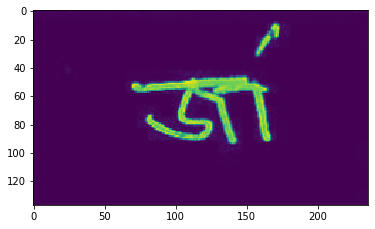

In [17]:
plt.imshow(Image.fromarray(get_random_img()))